In [131]:
import knn_model
import neural_network_model
import decision_tree_model
import naive_bayes_model
import random_forest_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [132]:
# Load the preprocessed dataset
new_df = pd.read_csv("Data/sorted_correlation_with_values.csv")

# Separate the features (X) and the target variable (y)
X = new_df.drop("Bankrupt?", axis=1).values
y = new_df["Bankrupt?"].values

# X: features, y: labels for up-sampling
X_resampled_up, y_resampled_up = SMOTE().fit_resample(X, y)

# X: features, y: labels for down-sampling
rus = RandomUnderSampler(random_state=42)
X_resampled_down, y_resampled_down = rus.fit_resample(X, y)

# Split the data into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_resampled_up, y_resampled_up, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_resampled_down, y_resampled_down, test_size=0.2, random_state=42)

In [133]:
# function for evaluation
def evaluate_model(model_name, model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("AUC: {:.4f}".format(roc_auc))
    print(f"RMSE: {rmse:.4f}")
    print()

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

In [134]:
# Train the KNN model
knn_model_1 = knn_model.train_knn_model(X_train_1, y_train_1)
knn_model_2 = knn_model.train_knn_model(X_train_2, y_train_2)
knn_model_3 = knn_model.train_knn_model(X_train_3, y_train_3)

# Train the neural network model
nn_model_1 = neural_network_model.train_neural_network_model(X_train_1, y_train_1, hidden_layer_sizes=(100,))
nn_model_2 = neural_network_model.train_neural_network_model(X_train_2, y_train_2, hidden_layer_sizes=(100,))
nn_model_3 = neural_network_model.train_neural_network_model(X_train_3, y_train_3, hidden_layer_sizes=(100,))

# # Train the decision tree model
dt_model_1 = decision_tree_model.train_decision_tree_model(X_train_1, y_train_1)
dt_model_2 = decision_tree_model.train_decision_tree_model(X_train_2, y_train_2)
dt_model_3 = decision_tree_model.train_decision_tree_model(X_train_3, y_train_3)


# Train the Naive Bayes model
nb_model_1 = naive_bayes_model.train_naive_bayes_model(X_train_1, y_train_1)
nb_model_2 = naive_bayes_model.train_naive_bayes_model(X_train_2, y_train_2)
nb_model_3 = naive_bayes_model.train_naive_bayes_model(X_train_3, y_train_3)

# # Train the random forest model
nf_model_1 = random_forest_model.train_random_forest_model(X_train_1, y_train_1)
nf_model_2 = random_forest_model.train_random_forest_model(X_train_2, y_train_2)
nf_model_3 = random_forest_model.train_random_forest_model(X_train_3, y_train_3)


KNN: Simple Model:
Accuracy: 0.9655
Precision: 0.7000
Recall: 0.1373
F1 score: 0.2295
Confusion Matrix:
[[1310    3]
 [  44    7]]
AUC: 0.6542
RMSE: 0.1856



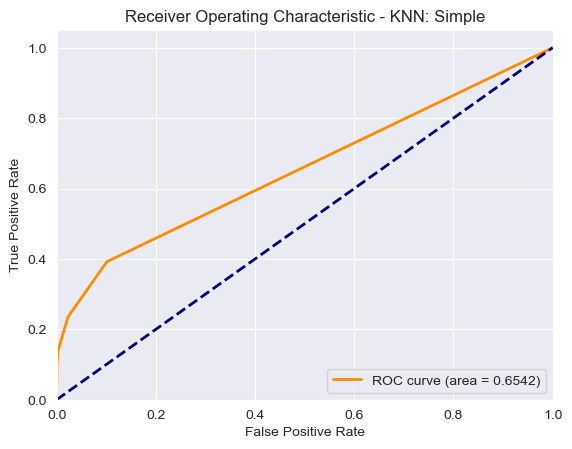

KNN: With up-sampling (SMOTE) Model:
Accuracy: 0.7742
Precision: 0.7944
Recall: 0.7335
F1 score: 0.7627
Confusion Matrix:
[[1086  248]
 [ 348  958]]
AUC: 0.8480
RMSE: 0.4751



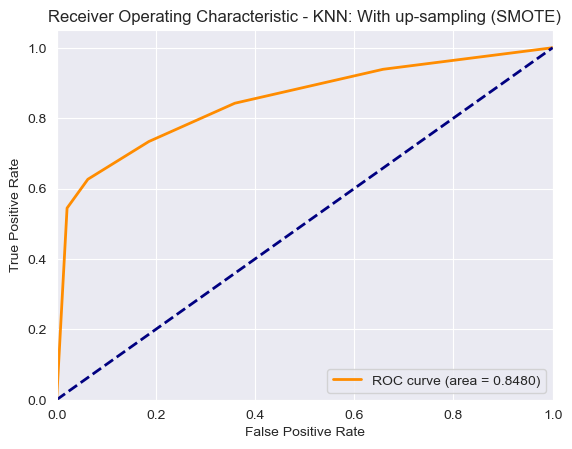

KNN: With down-sampling Model:
Accuracy: 0.4773
Precision: 0.3902
Recall: 0.4324
F1 score: 0.4103
Confusion Matrix:
[[26 25]
 [21 16]]
AUC: 0.4743
RMSE: 0.7230



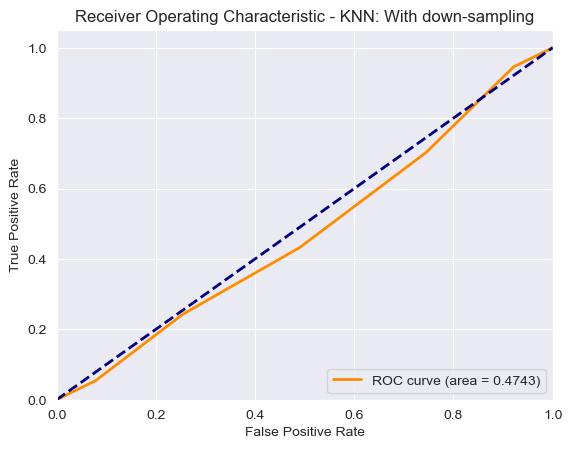

Neural Network: Simple Model:
Accuracy: 0.9626
Precision: 0.5000
Recall: 0.0588
F1 score: 0.1053
Confusion Matrix:
[[1310    3]
 [  48    3]]
AUC: 0.4591
RMSE: 0.1934



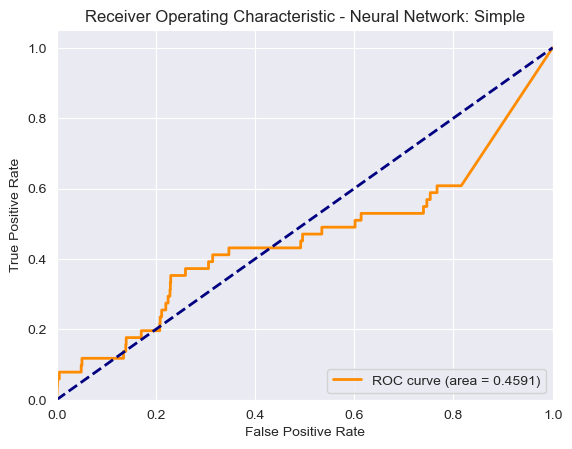

Neural Network: With up-sampling (SMOTE) Model:
Accuracy: 0.6473
Precision: 0.6774
Recall: 0.5482
F1 score: 0.6060
Confusion Matrix:
[[993 341]
 [590 716]]
AUC: 0.7191
RMSE: 0.5938



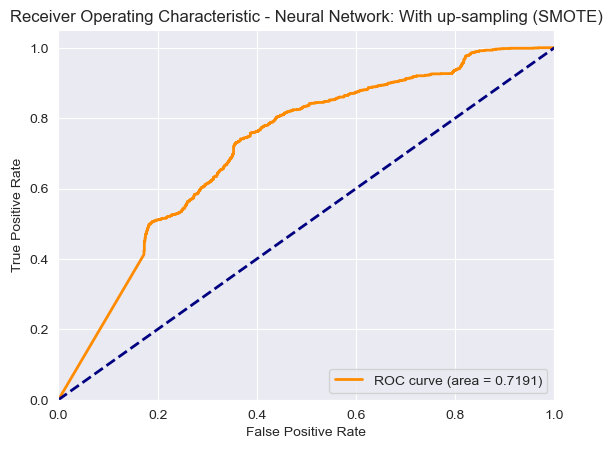

Neural Network: With down-sampling Model:
Accuracy: 0.6136
Precision: 1.0000
Recall: 0.0811
F1 score: 0.1500
Confusion Matrix:
[[51  0]
 [34  3]]
AUC: 0.4928
RMSE: 0.6216



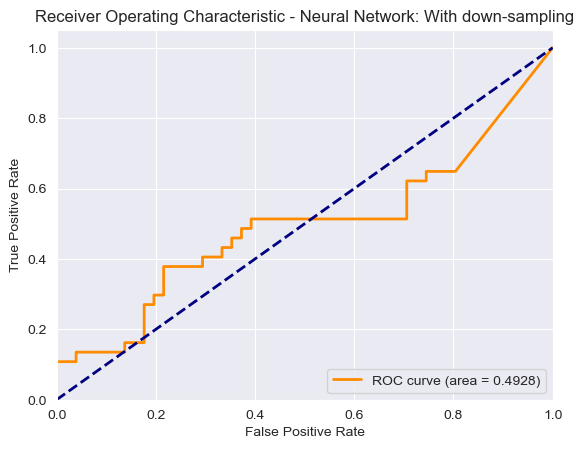

Decision Tree Model:
Accuracy: 0.9611
Precision: 0.4583
Recall: 0.2157
F1 score: 0.2933
Confusion Matrix:
[[1300   13]
 [  40   11]]
AUC: 0.8328
RMSE: 0.1971



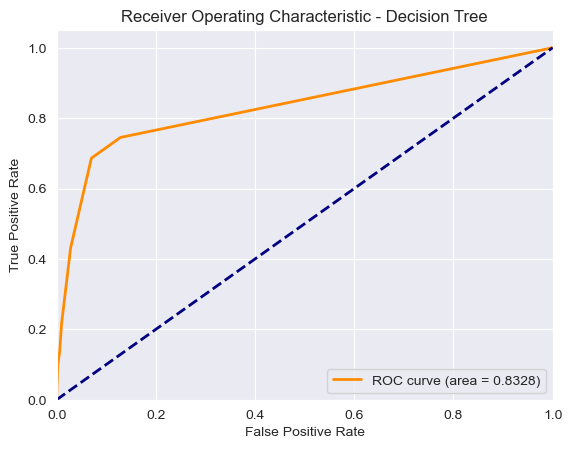

Decision Tree Model:
Accuracy: 0.9163
Precision: 0.9010
Recall: 0.9334
F1 score: 0.9169
Confusion Matrix:
[[1200  134]
 [  87 1219]]
AUC: 0.9444
RMSE: 0.2893



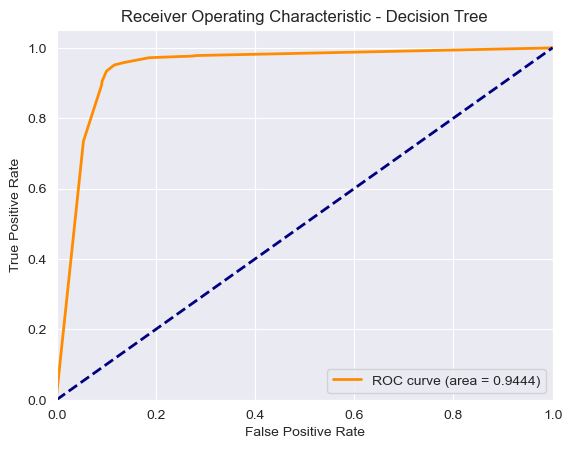

Decision Tree Model:
Accuracy: 0.8182
Precision: 0.7692
Recall: 0.8108
F1 score: 0.7895
Confusion Matrix:
[[42  9]
 [ 7 30]]
AUC: 0.7682
RMSE: 0.4264



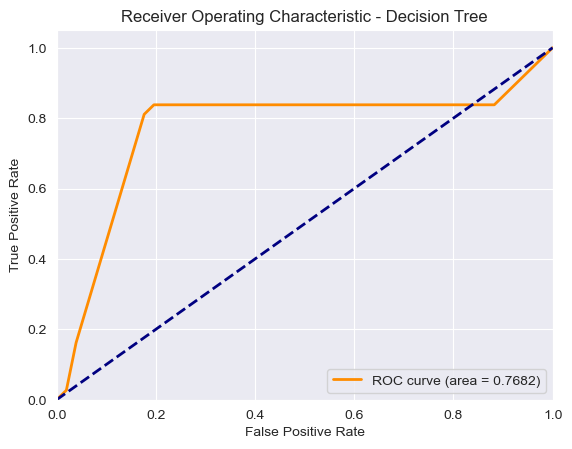

Naive Bayes: Simple Model:
Accuracy: 0.0367
Precision: 0.0367
Recall: 0.9804
F1 score: 0.0707
Confusion Matrix:
[[   0 1313]
 [   1   50]]
AUC: 0.6484
RMSE: 0.9815



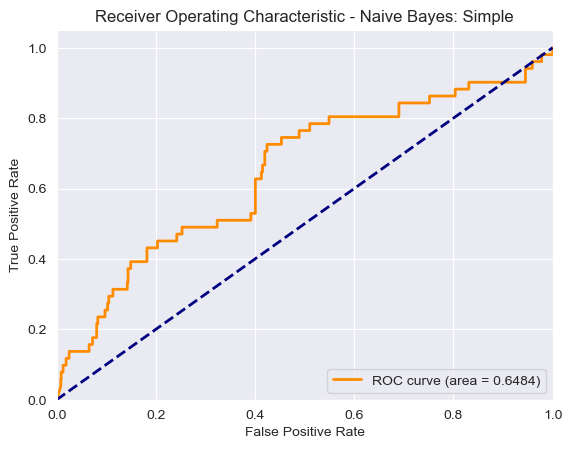

Naive Bayes: With up-sampling (SMOTE) Model:
Accuracy: 0.5235
Precision: 0.8636
Recall: 0.0436
F1 score: 0.0831
Confusion Matrix:
[[1325    9]
 [1249   57]]
AUC: 0.6738
RMSE: 0.6903



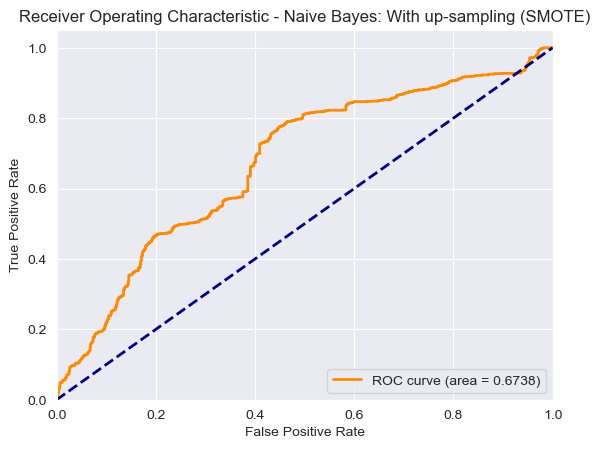

Naive Bayes: With down-sampling Model:
Accuracy: 0.5909
Precision: 1.0000
Recall: 0.0270
F1 score: 0.0526
Confusion Matrix:
[[51  0]
 [36  1]]
AUC: 0.6736
RMSE: 0.6396



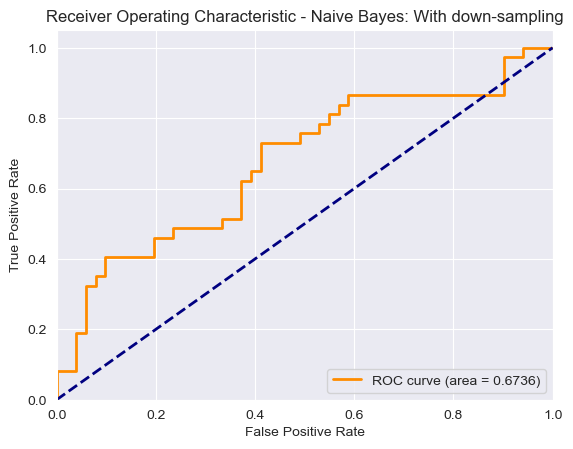

Random Forest: Simple Model:
Accuracy: 0.9641
Precision: 0.5625
Recall: 0.1765
F1 score: 0.2687
Confusion Matrix:
[[1306    7]
 [  42    9]]
AUC: 0.9160
RMSE: 0.1895



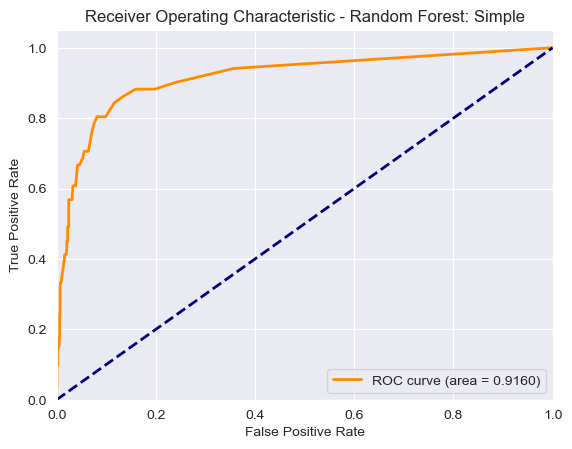

Random Forest: With up-sampling (SMOTE) Model:
Accuracy: 0.9723
Precision: 0.9536
Recall: 0.9923
F1 score: 0.9726
Confusion Matrix:
[[1271   63]
 [  10 1296]]
AUC: 0.9979
RMSE: 0.1663



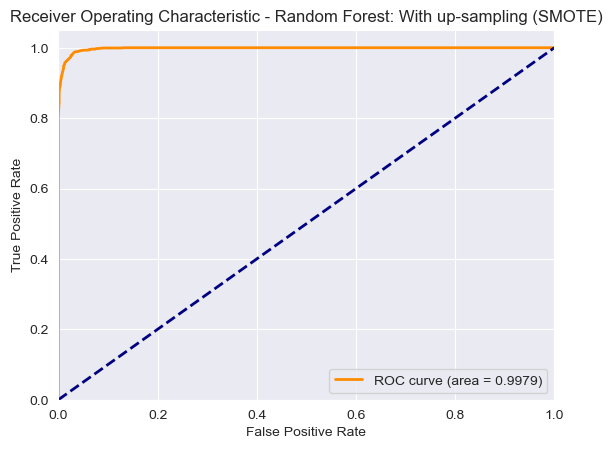

Random Forest: With down-sampling Model:
Accuracy: 0.8409
Precision: 0.7949
Recall: 0.8378
F1 score: 0.8158
Confusion Matrix:
[[43  8]
 [ 6 31]]
AUC: 0.9189
RMSE: 0.3989



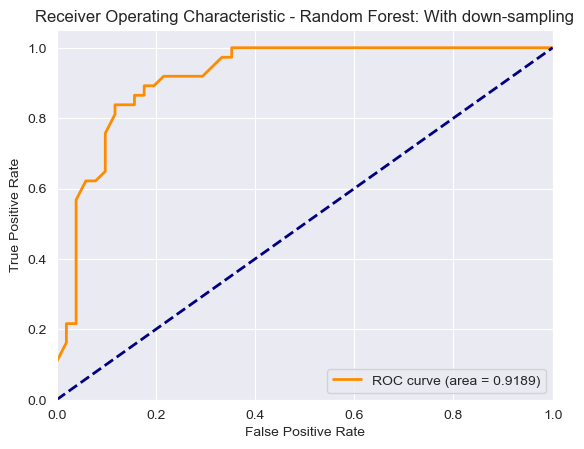

In [135]:
# Evaluate the KNN model
evaluate_model("KNN: Simple", knn_model_1, X_test_1, y_test_1)
evaluate_model("KNN: With up-sampling (SMOTE)", knn_model_2, X_test_2, y_test_2)
evaluate_model("KNN: With down-sampling", knn_model_3, X_test_3, y_test_3)

# Evaluate the Neural Network model
evaluate_model("Neural Network: Simple", nn_model_1, X_test_1, y_test_1)
evaluate_model("Neural Network: With up-sampling (SMOTE)", nn_model_2, X_test_2, y_test_2)
evaluate_model("Neural Network: With down-sampling", nn_model_3, X_test_3, y_test_3)

# Evaluate the Decision Tree model
evaluate_model("Decision Tree: Simple", dt_model_1, X_test_1, y_test_1)
evaluate_model("Decision Tree: With up-sampling (SMOTE)", dt_model_2, X_test_2, y_test_2)
evaluate_model("Decision Tree: With down-sampling", dt_model_3, X_test_3, y_test_3)

# Evaluate the Naive Bayes model
evaluate_model("Naive Bayes: Simple", nb_model_1, X_test_1, y_test_1)
evaluate_model("Naive Bayes: With up-sampling (SMOTE)", nb_model_2, X_test_2, y_test_2)
evaluate_model("Naive Bayes: With down-sampling", nb_model_3, X_test_3, y_test_3)

# Evaluate the Random Forest model
evaluate_model("Random Forest: Simple", nf_model_1, X_test_1, y_test_1)
evaluate_model("Random Forest: With up-sampling (SMOTE)", nf_model_2, X_test_2, y_test_2)
evaluate_model("Random Forest: With down-sampling", nf_model_3, X_test_3, y_test_3)
